In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jaxquantum as jqt
import jax.numpy as jnp

from jax import jit, vmap

import matplotlib.pyplot as plt


from jax import config
config.update("jax_enable_x64", True)

In [ ]:
import dynamiqs as dq

## Dynamiqs 

In [3]:
# parameters
n = 128      # Hilbert space dimension
omega = 1.0  # frequency
kappa = 0.1  # decay rate
alpha = 1.0  # initial coherent state amplitude

# initialize operators, initial state and saving times
a = dq.destroy(n)
H = omega * dq.dag(a) @ a
jump_ops = [jnp.sqrt(kappa) * a]
psi0 = dq.coherent(n, alpha)
tsave = jnp.linspace(0, 20.0, 101)

%timeit -n1 -r1 result = dq.mesolve(H, jump_ops, psi0, tsave)
%timeit result = dq.mesolve(H, jump_ops, psi0, tsave)

7.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.9 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Other

In [5]:
def map_kappa(kappa):
    # parameters
    n = 128      # Hilbert space dimension
    omega = 1.0  # frequency
    # kappa = 0.1  # decay rate
    alpha = 1.0  # initial coherent state amplitude

    # initialize operators, initial state and saving times
    a = dq.destroy(n)
    H = omega * dq.dag(a) @ a
    jump_ops = [jnp.sqrt(kappa) * a]
    psi0 = dq.coherent(n, alpha)
    tsave = jnp.linspace(0, 20.0, 101)

    # run simulation
    return dq.mesolve(H, jump_ops, psi0, tsave, exp_ops=[dq.dag(a) @ a], solver=dq.solver.Dopri5())


In [ ]:
from jax import jit, vmap

In [ ]:
jit(vmap(map_kappa))(jnp.linspace(0.1, 0.6, 6))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result.tsave, result.Esave[0])

In [ ]:
result.ysave[0].shape

In [ ]:
dq.plot_wigner(result.ysave[0])

## jaxquantum 

In [3]:
# parameters
n = 128      # Hilbert space dimension
omega = 1.0  # frequency
kappa = 0.1  # decay rate
alpha = 1.0  # initial coherent state amplitude

# initialize operators, initial state and saving times
a = jqt.destroy(n)
H = omega * jqt.dag(a) @ a
jump_ops = jnp.array([jnp.sqrt(kappa) * a])
psi0 = jqt.coherent(n, alpha)
tsave = jnp.linspace(0, 20.0, 101)

%timeit -n1 -r1 result = jqt.mesolve(jqt.ket2dm(psi0), tsave, c_ops=jump_ops, H0=H)
%timeit result = jqt.mesolve(jqt.ket2dm(psi0), tsave, c_ops=jump_ops, H0=H)

/home/shanj/miniconda3/envs/jax-framework/lib/python3.12/site-packages/equinox/_jit.py:49: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.
  out = fun(*args, **kwargs)


937 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
459 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


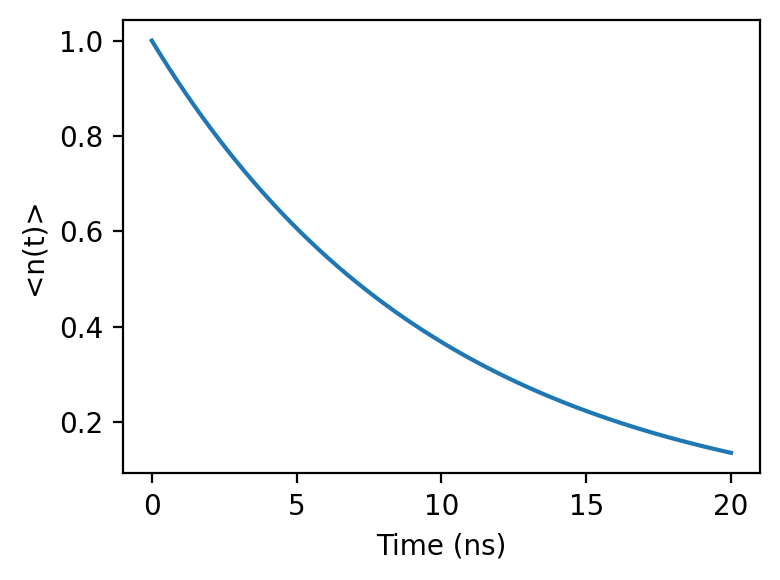

In [7]:
result = jqt.mesolve(jqt.ket2dm(psi0), tsave, c_ops=jump_ops, H0=H)
ns = jnp.real(jqt.calc_expect(jqt.dag(a) @ a, result))

fig, ax = plt.subplots(1, dpi=200, figsize=(4,3))
ax.plot(tsave, ns)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("<n(t)>")
fig.tight_layout()

### Other

In [5]:
result = jqt.mesolve(jqt.ket2dm(psi0), tsave, c_ops=jump_ops, H0=H)

In [6]:
def map_kappa(kappa):

    # parameters
    n = 128      # Hilbert space dimension
    omega = 1.0  # frequency
    # kappa = 0.1  # decay rate
    alpha = 1.0  # initial coherent state amplitude

    # initialize operators, initial state and saving times
    a = jqt.destroy(n)
    H = omega * jqt.dag(a) @ a
    jump_ops = jnp.array([jnp.sqrt(kappa) * a])
    psi0 = jqt.coherent(n, alpha)
    tsave = jnp.linspace(0, 20.0, 101)

    # run simulation
    return jqt.mesolve(jqt.ket2dm(psi0), tsave, c_ops=jump_ops, H0=H)

In [11]:
jit(vmap(map_kappa))(jnp.linspace(0.1, 0.6, 6))

Array([[[[ 3.67879441e-01+0.00000000e+00j,
           3.67879441e-01+0.00000000e+00j,
           2.60130048e-01+0.00000000e+00j, ...,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j],
         [ 3.67879441e-01+0.00000000e+00j,
           3.67879441e-01+0.00000000e+00j,
           2.60130048e-01+0.00000000e+00j, ...,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j],
         [ 2.60130048e-01+0.00000000e+00j,
           2.60130048e-01+0.00000000e+00j,
           1.83939721e-01+0.00000000e+00j, ...,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j],
         ...,
         [ 0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j, ...,
           0.00000000e+00+0.00000000e+00j,
           0.0000